<a href="https://colab.research.google.com/github/yohanesnuwara/ccs-gundih/blob/master/main/05_visualize_synthetic_seismic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize Synthetic Seismic Data of Gundih $CO_2$ Injection

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
!git clone https://www.github.com/yohanesnuwara/ccs-gundih

Cloning into 'ccs-gundih'...
remote: Enumerating objects: 342, done.
remote: Total 342 (delta 0), reused 0 (delta 0), pack-reused 342
Receiving objects: 100% (342/342), 21.81 MiB | 31.50 MiB/s, done.
Resolving deltas: 100% (198/198), done.


In [0]:
!pip install obspy

## Synthetic Seismic at Baseline (before injection)

In [0]:
from obspy.io.segy.segy import _read_segy

baseline = _read_segy('/content/ccs-gundih/data/seismics/Nov2019_M0.sgy', headonly=True)

In [0]:
baseline

237 traces in the SEG Y structure.

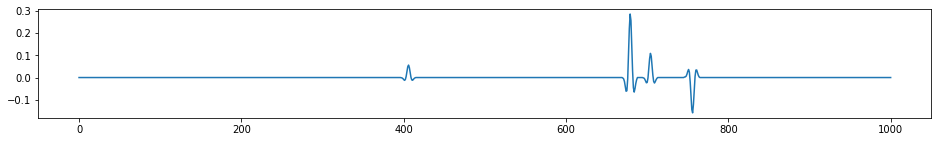

In [0]:
one_trace_m0 = baseline.traces[190]

plt.figure(figsize=(16,2))
plt.plot(one_trace_m0.data)
plt.show()

In [0]:
data_m0 = np.stack(t.data for t in baseline.traces)
data_m0.shape  # traces, time samples

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


(237, 1001)

In [0]:
vm = np.percentile(data_m0, 99)
print("The 99th percentile is {:.0f}; the max amplitude is {:.0f}".format(vm, data_m0.max()))

The 99th percentile is 0; the max amplitude is 0


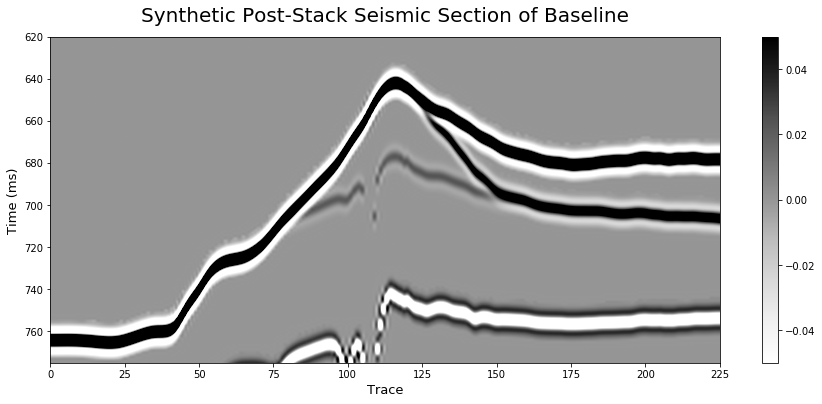

In [0]:
plt.figure(figsize=(15,6))
plt.imshow(data_m0.T, cmap="Greys", vmin=-0.05, vmax=0.05, aspect='auto', interpolation='lanczos')
plt.colorbar()
plt.title('Synthetic Post-Stack Seismic Section of Baseline', size=20, pad=15)
plt.xlabel('Trace', size=13); plt.ylabel('Time (ms)', size=13)
plt.xlim(0, 225); plt.ylim(775, 620)
# plt.grid(True, axis='y', color='black')
plt.show()

## Synthetic Seismic after 10 years injection (Monitor, M2)

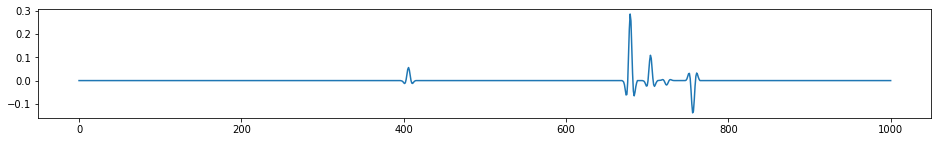

In [0]:
monitor2 = _read_segy('/content/ccs-gundih/data/seismics/Nov2019_M2.sgy', headonly=True)

one_trace_m2 = monitor2.traces[190]

plt.figure(figsize=(16,2))
plt.plot(one_trace_m2.data)
plt.show()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


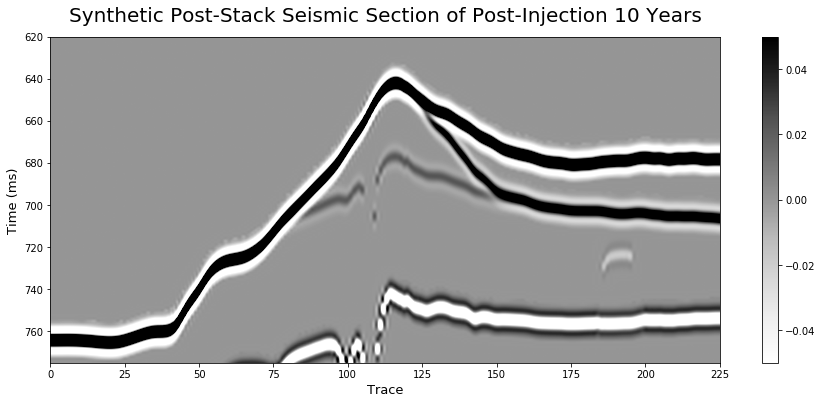

In [0]:
data_m2 = np.stack(t.data for t in monitor2.traces)

plt.figure(figsize=(15,6))
plt.imshow(data_m2.T, cmap="Greys", vmin=-0.05, vmax=0.05, aspect='auto', interpolation='lanczos')
plt.colorbar()
plt.title('Synthetic Post-Stack Seismic Section of Post-Injection 10 Years', size=20, pad=15)
plt.xlabel('Trace', size=13); plt.ylabel('Time (ms)', size=13)
plt.xlim(0, 225); plt.ylim(775, 620)
# plt.grid(True, axis='y', color='black')
plt.show()

## Original Seismic Data

In [0]:
ori = _read_segy('/content/ccs-gundih/data/seismics/2D_Xline_12680.sgy', headonly=True)
ori

650 traces in the SEG Y structure.

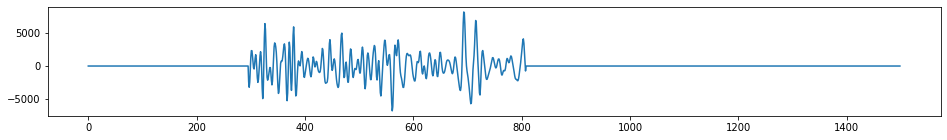

In [0]:
one_trace_ori = ori.traces[400]

plt.figure(figsize=(16,2))
plt.plot(one_trace_ori.data)
plt.show()

In [0]:
data_ori = np.stack(i.data for i in ori.traces)
vm = np.percentile(data_ori, 99)
print("The 99th percentile is {:.0f}; the max amplitude is {:.0f}".format(vm, data_ori.max()))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


The 99th percentile is 4374; the max amplitude is 11907


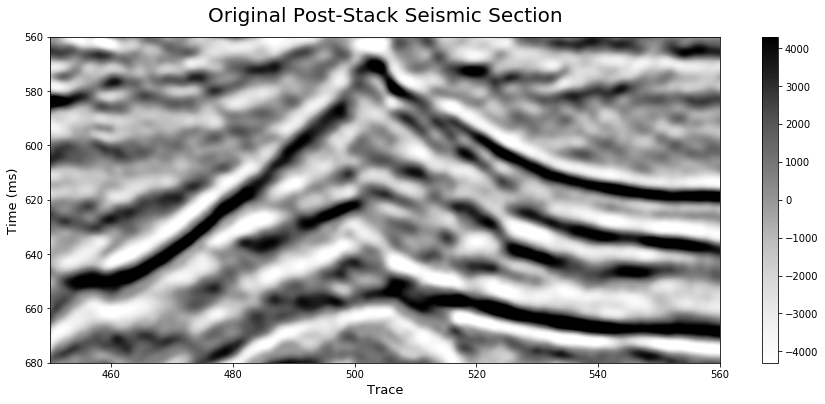

In [0]:
plt.figure(figsize=(15,6))
plt.imshow(data_ori.T, cmap="Greys", vmin=-4300, vmax=4300, aspect='auto', interpolation='lanczos')
plt.colorbar()
plt.title('Original Post-Stack Seismic Section', size=20, pad=15)
plt.xlabel('Trace', size=13); plt.ylabel('Time (ms)', size=13)
plt.xlim(450, 560); plt.ylim(680, 560)
# plt.grid(True, axis='y', color='grey')
plt.show()

## Velocity Model

In [0]:
vel = _read_segy('/content/ccs-gundih/data/seismics/2D_Vel_Xline_12680.sgy', headonly=True)
vel

650 traces in the SEG Y structure.

In [0]:
data_vel = np.stack(i.data for i in vel.traces)
vm = np.percentile(data_vel, 99)
print("The 99th percentile is {:.0f}; the max amplitude is {:.0f}".format(vm, data_vel.max()))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


The 99th percentile is 4923; the max amplitude is 6721


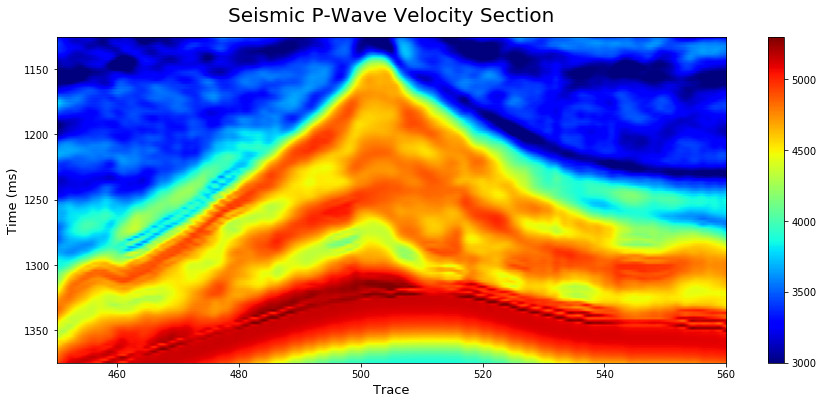

In [0]:
plt.figure(figsize=(15,6))
plt.imshow(data_vel.T, cmap="jet", vmin=3000, vmax=5300, aspect='auto', interpolation='lanczos')
plt.colorbar()
plt.title('Seismic P-Wave Velocity Section', size=20, pad=15)
plt.xlabel('Trace', size=13); plt.ylabel('Time (ms)', size=13)
plt.xlim(450, 560); plt.ylim(1375, 1125)
# plt.grid(True, axis='y', color='grey')
plt.show()